### Part A – Q1: Data Loading and Class Imbalance Analysis

In this task, we load the `creditcard.csv` dataset and examine the class distribution to understand the degree of imbalance in the dataset. This dataset contains transactions made by credit cards in September 2013 by European cardholders. Since fraud detection typically involves a very small proportion of fraudulent transactions, this analysis will help justify the need for rebalancing strategies such as GMM-based oversampling.

We will perform basic data loading, shape inspection, and data type checks here.

In [17]:
# Part A - Q1: Load and Explore the Dataset
import pandas as pd

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Show shape and basic info
print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")
print("\nDataset Info:")
df.info()

Total Rows: 284807, Total Columns: 31

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64


In [18]:
# Show top few rows
print("\nFirst 5 Rows:")
display(df.head())


First 5 Rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
# Check for missing values
print("\nMissing Values Check:")
print(df.isnull().sum().sort_values(ascending=False))


Missing Values Check:
Time      0
V16       0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V15       0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
Class     0
dtype: int64


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each class
class_counts = df['Class'].value_counts()
print("Class Distribution:\n", class_counts)

# Calculate percentage
fraud_percent = class_counts[1] / class_counts.sum() * 100
print(f"\nFraudulent transactions: {fraud_percent:.4f}%")

Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

Fraudulent transactions: 0.1727%


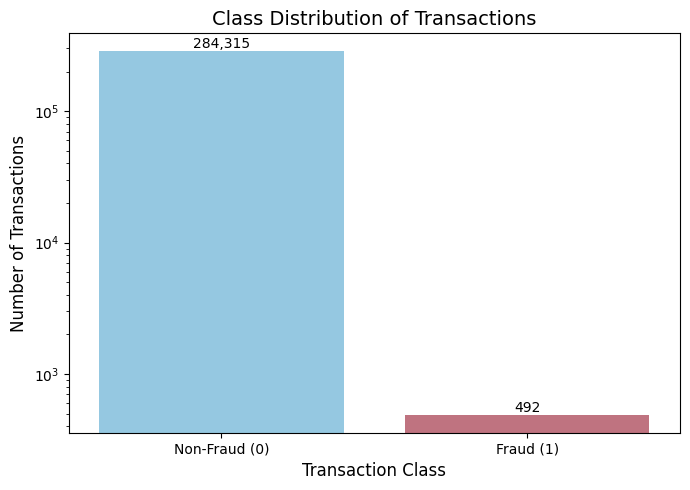

In [21]:
# === Bar Plot (with log scale) ===
plt.figure(figsize=(7,5))
colors = ['#88CCEE', '#CC6677']
bars = sns.barplot(
    x=class_counts.index.astype(str),
    y=class_counts.values,
    palette=colors
)
plt.yscale('log')
plt.xlabel("Transaction Class", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.title("Class Distribution of Transactions", fontsize=14)
plt.xticks([0,1], ['Non-Fraud (0)', 'Fraud (1)'])
for index, value in enumerate(class_counts.values):
    bars.text(index, value, f'{value:,}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

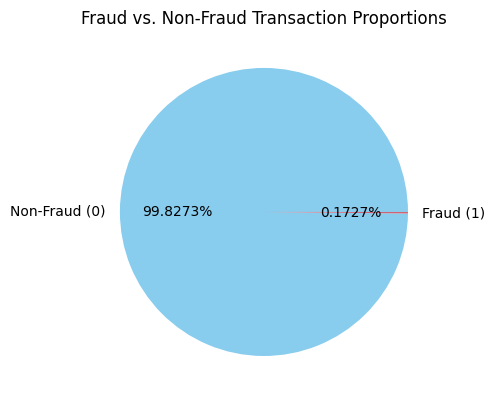

In [22]:
# === Pie Chart ===
plt.figure(figsize=(5,5))
plt.pie(
    class_counts,
    labels=['Non-Fraud (0)', 'Fraud (1)'],
    autopct='%1.4f%%',
    colors=colors,
    textprops={'fontsize': 10}
)
plt.title("Fraud vs. Non-Fraud Transaction Proportions", fontsize=12)
plt.tight_layout()
plt.show()

From the visualizations, we observe that fraudulent transactions make up **only ~0.1727%** of the dataset.  
This severe imbalance is clearly visible in the bar chart and is better understood via the pie chart.

Such skewed distribution can severely affect model performance — most models would predict "Non-Fraud" for all inputs to achieve >99% accuracy.  
Hence, we need to focus on **Recall, Precision, and F1-score** for the minority class and adopt **resampling strategies** to train a fair model.

### Part A – Q2: Baseline Model Training on Imbalanced Data

In this step, we split the dataset into training and test sets, ensuring the **test set reflects the original class imbalance**. We then train a **Logistic Regression classifier** on the imbalanced training set to serve as a baseline.

Key points:
- The test set must maintain the natural imbalance for fair evaluation.
- We use stratified sampling to preserve class ratios in both sets.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Drop 'Time' column, keep 'Amount' and PCA components
X = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

# Stratified split to maintain imbalance ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training Set Size: {X_train.shape}")
print(f"Test Set Size: {X_test.shape}")
print(f"Fraud cases in Test Set: {sum(y_test)} / {len(y_test)}")

Training Set Size: (199364, 29)
Test Set Size: (85443, 29)
Fraud cases in Test Set: 148 / 85443


The test set retains its original imbalance, **148 / 85443 ~ 0.1732**.

In [24]:
# Train Logistic Regression on imbalanced data
model_1 = LogisticRegression(max_iter=1000, class_weight=None, solver='liblinear')
model_1.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

### Part A – Q3: Baseline Evaluation on the Imbalanced Test Set

In this step, we evaluate the performance of the baseline Logistic Regression model on the original, imbalanced test set. Given the nature of the fraud detection problem, the evaluation focuses on metrics that emphasize minority class performance.

Accuracy alone is not a meaningful indicator in imbalanced scenarios, as it can be artificially inflated by the dominant class. Instead, we use the following metrics:

- **Precision (Fraud)**: Measures how many of the predicted frauds were actually fraud.
- **Recall (Fraud)**: Measures how many actual frauds were successfully detected.
- **F1-Score (Fraud)**: Provides a balance between precision and recall.
- **Confusion Matrix**: Visualizes the model’s performance in terms of TP, FP, TN, and FN.
- **ROC–AUC**: Evaluates the model’s ability to distinguish between the two classes across all thresholds.

Classification Report – Baseline Logistic Regression

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     85295
       Fraud       0.86      0.62      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



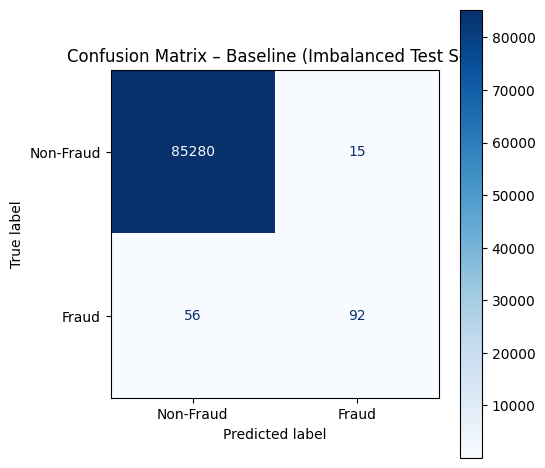

ROC–AUC: 0.9547


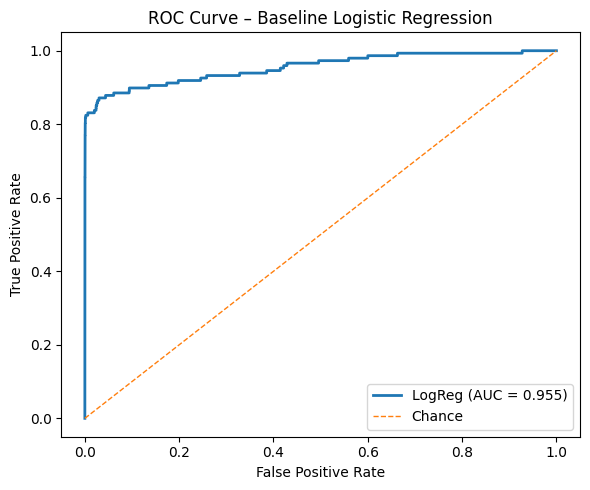

In [25]:
# Part A – Q3: Baseline Evaluation

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)

# 1) Predictions
y_pred = model_1.predict(X_test)
y_score = model_1.predict_proba(X_test)[:, 1]  # Probabilities for positive class (Fraud=1)

# 2) Text metrics: Precision, Recall, F1
print("Classification Report – Baseline Logistic Regression\n")
print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

# 3) Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
fig, ax = plt.subplots(figsize=(5.5, 5))
disp.plot(cmap='Blues', ax=ax, values_format='d')
ax.set_title("Confusion Matrix – Baseline (Imbalanced Test Set)")
plt.tight_layout()
plt.show()

# 4) ROC Curve + AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
auc_value = roc_auc_score(y_test, y_score)
print(f"ROC–AUC: {auc_value:.4f}")

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, linewidth=2, label=f'LogReg (AUC = {auc_value:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', linewidth=1, label='Chance')
plt.title('ROC Curve – Baseline Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()


#### Inference: Why Class-Specific Metrics Matter

The classification report shows a precision of 0.86 and recall of 0.62 for the fraud class. This indicates that while the model is reasonably confident when it predicts fraud, it fails to detect a significant number of actual fraud cases.

This highlights a critical limitation of relying on accuracy in imbalanced classification: the model achieves nearly 100% accuracy simply by correctly predicting the dominant non-fraud class. However, such a model may still miss many fraudulent transactions, which defeats the purpose of deploying a fraud detection system.

Metrics like **precision, recall, and F1-score** for the minority class offer a more targeted assessment:
- **Precision** helps assess false alarm rate, which is important in reducing unnecessary investigations.
- **Recall** reflects the model’s sensitivity to actual fraud, which is often the most critical requirement.
- **F1-score** balances both concerns and gives a single interpretable measure of performance.

Finally, the ROC–AUC score of 0.955 suggests the model performs well at distinguishing between classes in general. However, to improve recall — and thus the model's usefulness in real-world fraud detection — we must apply rebalancing strategies such as GMM-based synthetic sampling.

### Part B – Q1: Theoretical Foundation — Why Use GMM Instead of SMOTE

In this section, we explain the **key differences between GMM-based synthetic sampling and SMOTE**, and why GMM is more powerful in capturing the true underlying distribution of the minority class.

#### 1. SMOTE: What It Does and Its Limitations

SMOTE (Synthetic Minority Over-sampling Technique) generates new samples by:
- Selecting a random minority class sample `x_i` 
- Choosing one of its `k` nearest neighbors `x_j`
- Creating a synthetic point along the line segment between them:
  
  $$ x_{\text{new}} = x_i + \lambda \cdot (x_j - x_i), \quad \lambda \in [0, 1] $$

This assumes the local region around a sample is *linear* and *homogeneous*, which is often not true in real-world data like fraud detection. For example:
- If the minority class has **non-linear boundaries**, SMOTE may create samples in the wrong region.
- If the minority class has **multiple dense subgroups**, SMOTE might interpolate across them and generate invalid samples.
- It does **not model the actual probability distribution** of the data — it's purely geometric.

#### 2. GMM: Probabilistic Modeling for Realistic Sampling

A **Gaussian Mixture Model (GMM)** learns the underlying probability distribution of a dataset by modeling it as a weighted sum of `k` Gaussian distributions:

$$
p(x) = \sum_{i=1}^{k} \pi_i \cdot \mathcal{N}(x \mid \mu_i, \Sigma_i)
$$

Each component captures a **local cluster (or mode)** of the data, with its own:
- Mean $ \mu_i $ (center of cluster)
- Covariance $ \Sigma_i $ (shape and orientation)
- Mixing weight $ \pi_i $ (relative importance)

After fitting a GMM to the **minority class**, we can:
- **Sample new points probabilistically** from the learned model
- Ensure that the synthetic points lie in high-density regions
- Preserve **non-linear shapes, anisotropic spreads, and multiple modes**

This avoids the interpolation bias of SMOTE and generates **data that follows the same distribution as the true minority class** — as also shown in the class example.

#### 3. Why GMM is Better for This Problem

In the credit card fraud dataset:
- Fraud patterns may form **non-contiguous, sparse clusters** in high-dimensional space.
- GMM can capture **multiple fraud “types”** as distinct Gaussian components.
- Sampling from GMM ensures that synthetic fraud samples are **statistically plausible**, unlike SMOTE which may interpolate across unrelated types of fraud.

#### Summary

| Technique | Nature | Distribution-Aware | Handles Multimodal Clusters | Limitation |
|----------|--------|---------------------|-----------------------------|------------|
| SMOTE | Geometric (interpolation) | No | No | May create out-of-distribution samples |
| GMM | Probabilistic (density-based) | Yes | Yes | Sensitive to number of components |

> Therefore, GMM is a more theoretically sound choice for generating realistic, diverse, and distribution-respecting samples — especially when the minority class is complex and sparse.

### Part B – Q2: Fitting a GMM on the Minority Class and Choosing `k` via AIC/BIC

In this section, we model the minority (fraud) class density with a Gaussian Mixture Model (GMM), and justify the number of mixture components `k` using information criteria.

Procedure:
1. Extract the minority-class samples from the **training split only** (to avoid test‑set leakage).
2. Standardize features for stable covariance estimation (GMM is scale‑sensitive).
3. For `k = 1 … K_max`, fit a GMM and record **AIC** and **BIC**.
   - Lower AIC/BIC indicates a better trade‑off between fit quality and model complexity.
   - We select `k* = argmin(BIC)`, then refit a final GMM with `k*`.

Minority samples in training set: 344 / 199364
Selected number of components (by BIC): k* = 3
Converged: True  |  Iterations: 8
Component weights (sum to 1): [0.2267 0.6831 0.0901]


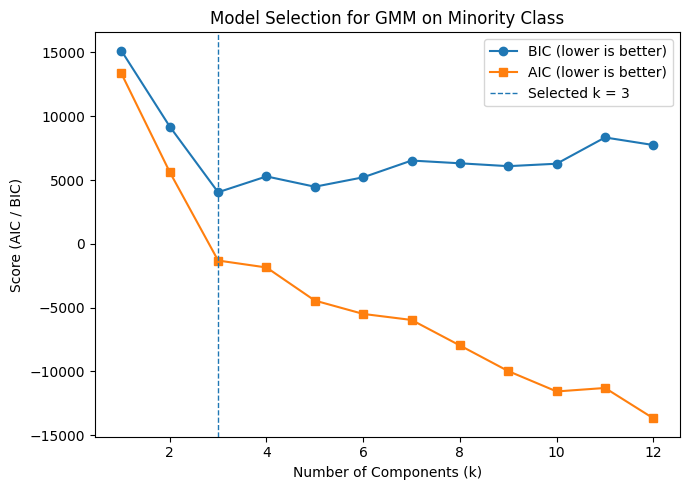

In [ ]:
# Part B – Q2: GMM Implementation (minority class only)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# 1) Extract minority (fraud) samples from TRAINING split only
X_train_min = X_train[y_train == 1].copy()

print(f"Minority samples in training set: {X_train_min.shape[0]} / {X_train.shape[0]}")

# 2) Standardize features for GMM (separate scaler so baseline remains unaffected)
gmm_scaler = StandardScaler()
X_train_min_scaled = gmm_scaler.fit_transform(X_train_min)

# 3) Fit GMMs for a range of k and collect AIC/BIC
K_min, K_max = 1, 12
ks = np.arange(K_min, K_max + 1)

aics, bics, gmms = [], [], []

for k in ks:
    gmm = GaussianMixture(
        n_components=k,
        covariance_type='full',      
        n_init=3,                    
        max_iter=500,
        reg_covar=1e-6,             
        random_state=42
    )
    gmm.fit(X_train_min_scaled)
    aics.append(gmm.aic(X_train_min_scaled))
    bics.append(gmm.bic(X_train_min_scaled))
    gmms.append(gmm)

# 4) Choose k* by BIC (lower is better). Feel free to inspect AIC too.
k_star_idx = int(np.argmin(bics))
k_star = ks[k_star_idx]
gmm_opt = gmms[k_star_idx]

print(f"Selected number of components (by BIC): k* = {k_star}")
print(f"Converged: {gmm_opt.converged_}  |  Iterations: {gmm_opt.n_iter_}")
print(f"Component weights (sum to 1): {np.round(gmm_opt.weights_, 4)}")

# 5) Plot AIC/BIC vs k (Seven Commandments: title, labels, legend)
plt.figure(figsize=(7, 5))
plt.plot(ks, bics, marker='o', label='BIC (lower is better)')
plt.plot(ks, aics, marker='s', label='AIC (lower is better)')
plt.axvline(k_star, linestyle='--', linewidth=1, label=f'Selected k = {k_star}')
plt.title('Model Selection for GMM on Minority Class')
plt.xlabel('Number of Components (k)')
plt.ylabel('Score (AIC / BIC)')
plt.legend()
plt.tight_layout()
plt.show()

# gmm_opt is the fitted model for k*, and gmm_scaler is the scaler.
# We will use (gmm_opt, gmm_scaler) in Part B – Q3 to generate synthetic samples.

Using the Bayesian Information Criterion (BIC), the optimal number of components for the Gaussian Mixture Model fit on the minority class was determined to be **k = 3**. This indicates that the minority class (fraudulent transactions) likely consists of **three distinct subgroups** in feature space — each with different statistical characteristics.

Key observations:
- The BIC curve shows a clear minimum at `k = 3`, beyond which it flattens or worsens. This suggests that adding more components does not meaningfully improve model fit while increasing complexity.
- The AIC curve continues to decrease, as expected, but BIC is more conservative due to its stronger penalty on model complexity — making it more suitable for small datasets like ours (only 344 fraud samples).
- The final GMM converged quickly (8 EM steps), and the component weights indicate an **imbalanced structure** among the subgroups.

This analysis supports the idea that **fraudulent behavior is heterogeneous**, possibly reflecting different fraud strategies or transaction patterns — which a GMM can model more effectively than interpolation-based methods like SMOTE.

### Part B – Q3: Synthetic Minority Samples from the Fitted GMM

**Goal.** Use the minority‑only GMM (fit in Q2) to generate realistic fraud samples and combine them with the original training set.

**How sampling works.**  
A Gaussian Mixture defines a density $p(x)=\sum_{i=1}^k \pi_i \mathcal{N}(x\mid \mu_i,\Sigma_i)$.  
To draw one sample:
1. Pick a component index $z \sim \text{Categorical}(\pi_1,\dots,\pi_k)$.
2. Draw $x \sim \mathcal{N}(\mu_z,\Sigma_z)$.

Repeating this produces synthetic points concentrated in **high‑density regions** of the minority class (each mode’s shape and orientation are preserved by the learned covariances).

**Procedure we follow.**
1. Decide a target minority size (here: **1:1** with the current majority in the *training* split).  
2. Draw the required number of samples from the GMM **in the scaled space** and map them back with the **inverse transform** of the scaler used in Q2 (to keep feature scales consistent with the rest of the training data).
3. Minor post‑processing (e.g., clip `Amount` to be non‑negative).
4. Concatenate synthetic rows with the original training set to obtain an augmented training set for Part C.

We do not touch the test set at any point (no leakage).

In [27]:
# Part B – Q3: Generate synthetic minority samples and augment the training set

import numpy as np
import pandas as pd

rng = np.random.RandomState(42)  # reproducibility for any auxiliary randomness

# 1) Compute target size for a 1:1 class balance within TRAINING split
n_min_train = int((y_train == 1).sum())
n_maj_train = int((y_train == 0).sum())
target_minority = n_maj_train                   # aim: minority count equals majority count
n_to_sample = max(0, target_minority - n_min_train)

print(f"Minority in train (real): {n_min_train}")
print(f"Majority in train (real): {n_maj_train}")
print(f"Synthetic samples to draw for 1:1: {n_to_sample}")

# If nothing to sample (rare), just keep originals
if n_to_sample == 0:
    X_syn_df = pd.DataFrame(columns=X_train.columns)
else:
    # 2) Sample in the scaled feature space learned in Q2
    #    gmm_opt was fit on X_train_min_scaled = gmm_scaler.fit_transform(X_train[y_train==1])
    X_syn_scaled, z_comp = gmm_opt.sample(n_samples=n_to_sample)

    # 3) Map back to original feature scale expected by the downstream model
    X_syn = gmm_scaler.inverse_transform(X_syn_scaled)

    # 4) Wrap into a DataFrame with the same column order as X_train
    X_syn_df = pd.DataFrame(X_syn, columns=X_train.columns)

    # 5) Optional sanity: enforce non-negativity on 'Amount' (PCA cols may be any real number)
    if 'Amount' in X_syn_df.columns:
        X_syn_df['Amount'] = np.clip(X_syn_df['Amount'], a_min=0.0, a_max=None)

# 6) Create labels for synthetic rows
y_syn = pd.Series(np.ones(len(X_syn_df), dtype=int), index=X_syn_df.index, name='Class')

# 7) Concatenate with original training data to form the augmented set
X_train_gmm = pd.concat([X_train, X_syn_df], axis=0, ignore_index=True)
y_train_gmm = pd.concat([y_train.reset_index(drop=True), y_syn.reset_index(drop=True)], axis=0)

print("\nAugmented training shapes:")
print(f"X_train_gmm: {X_train_gmm.shape}")
print(f"y_train_gmm: {y_train_gmm.shape}")

# 8) Quick check on new class counts in TRAINING data
counts_before = y_train.value_counts().sort_index()
counts_after  = y_train_gmm.value_counts().sort_index()
summary = pd.DataFrame({
    'Before_Augmentation': counts_before,
    'After_Augmentation': counts_after
})
summary.index = ['Non-Fraud (0)', 'Fraud (1)']
print("\nTraining class counts (before vs after):")
display(summary)

Minority in train (real): 344
Majority in train (real): 199020
Synthetic samples to draw for 1:1: 198676

Augmented training shapes:
X_train_gmm: (398040, 29)
y_train_gmm: (398040,)

Training class counts (before vs after):


,Before_Augmentation,After_Augmentation
Non-Fraud (0),199020,199020
Fraud (1),344,199020


### Part B – Q4: 50,000‑Sample Balanced Set via CBU + GMM

We build a separate training set of exactly **50,000 rows**:
- **25,000 majority (Non‑Fraud)** via **Clustering‑Based Undersampling** (KMeans with `k=4` (from A3) on the majority class; sample per cluster proportional to its size).
- **25,000 minority (Fraud)** by taking all real minority from the training split and drawing the remaining from the **fitted GMM** (Q2), then inverse‑scaling back to the original feature space.

The test set remains untouched.

In [28]:
# Part B – Q4: Build a separate 50,000-sample balanced set with CBU (k=4) + GMM

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

TARGET_PER_CLASS = 25_000
RNG = np.random.RandomState(42)

# Split training by class (use existing X_train, y_train from Part A)
X_min = X_train[y_train == 1].copy()
X_maj = X_train[y_train == 0].copy()

# ----- Majority via CBU (k=4) -----
maj_scaler = StandardScaler()
X_maj_scaled = maj_scaler.fit_transform(X_maj)

kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_maj_scaled)

# sample per cluster proportional to its size
idx = X_maj.index.to_numpy()
sizes = pd.Series(labels).value_counts().sort_index().to_numpy()
quota = np.floor((sizes / sizes.sum()) * TARGET_PER_CLASS).astype(int)
quota[0:TARGET_PER_CLASS - quota.sum()] += 1  # fix rounding

sel_idx = []
for c in range(4):
    pool = idx[labels == c]
    q = min(len(pool), quota[c])
    sel_idx.append(RNG.choice(pool, size=q, replace=False))
sel_idx = np.concatenate(sel_idx)
X_maj_cbu = X_train.loc[sel_idx]
y_maj_cbu = pd.Series(np.zeros(len(X_maj_cbu), dtype=int), name='Class')

# ----- Minority via GMM to reach 25,000 -----
need = max(0, TARGET_PER_CLASS - len(X_min))
if need > 0:
    X_syn_scaled, _ = gmm_opt.sample(n_samples=need)          # from Part B–Q2
    X_syn = gmm_scaler.inverse_transform(X_syn_scaled)
    X_syn = pd.DataFrame(X_syn, columns=X_train.columns)
    if 'Amount' in X_syn.columns:
        X_syn['Amount'] = np.clip(X_syn['Amount'], 0, None)
    X_min_final = pd.concat([X_min.reset_index(drop=True), X_syn], ignore_index=True)
else:
    # if ever overabundant, downsample to TARGET_PER_CLASS
    X_min_final = X_min.sample(TARGET_PER_CLASS, random_state=42).reset_index(drop=True)

y_min_final = pd.Series(np.ones(len(X_min_final), dtype=int), name='Class')

# If we overshot by 1–2 rows due to rounding, trim safely
if len(X_min_final) > TARGET_PER_CLASS:
    keep = RNG.choice(len(X_min_final), size=TARGET_PER_CLASS, replace=False)
    X_min_final = X_min_final.iloc[keep].reset_index(drop=True)
    y_min_final = y_min_final.iloc[keep].reset_index(drop=True)

# ----- Assemble the 50k balanced dataset -----
X_train_cbu_gmm = pd.concat([X_maj_cbu.reset_index(drop=True), X_min_final], ignore_index=True)
y_train_cbu_gmm = pd.concat([y_maj_cbu.reset_index(drop=True), y_min_final.reset_index(drop=True)], ignore_index=True)

# Shuffle
perm = RNG.permutation(len(X_train_cbu_gmm))
X_train_cbu_gmm = X_train_cbu_gmm.iloc[perm].reset_index(drop=True)
y_train_cbu_gmm = y_train_cbu_gmm.iloc[perm].reset_index(drop=True)

print(f"Shapes => X: {X_train_cbu_gmm.shape}, y: {y_train_cbu_gmm.shape}")
print(y_train_cbu_gmm.value_counts().sort_index().rename(index={0:'Non-Fraud',1:'Fraud'}))

Shapes => X: (50000, 29), y: (50000,)
Class
Non-Fraud    25000
Fraud        25000
Name: count, dtype: int64


### Part C – Q1: Train and Evaluate on GMM‑Balanced Data (Both Versions)

We train Logistic Regression models on two rebalanced training sets and evaluate them on the original, imbalanced test set to ensure comparability with the baseline:

- **Version A (Q3):** Original train + GMM oversampled minority to match majority.
- **Version B (Q4):** Separate 50k dataset built via CBU on majority (25k) + GMM on minority (25k).

For each version we:
1) Standardize features on the training split,
2) Fit Logistic Regression,
3) Report Precision/Recall/F1 for the minority class, confusion matrix, and ROC–AUC.

Classification Report — Version A (Train: Q3 GMM‑augmented)
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.98      0.99     85295
       Fraud       0.09      0.86      0.15       148

    accuracy                           0.98     85443
   macro avg       0.54      0.92      0.57     85443
weighted avg       1.00      0.98      0.99     85443



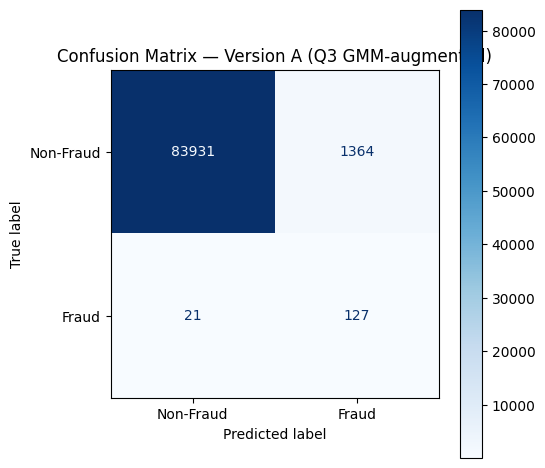

ROC–AUC (Version A): 0.9681


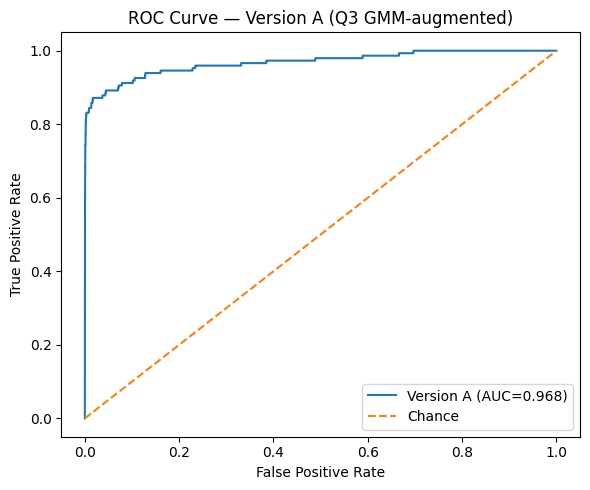

In [29]:
# Part C – Q1 (Version A): Train on Q3 GMM‑augmented set, test on original test set

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score
)

# Safety checks
assert 'X_train_gmm' in globals() and 'y_train_gmm' in globals(), "Q3 dataset not found."

# 1) Pipeline: Standardize -> Logistic Regression
pipe_A = make_pipeline(
    StandardScaler(with_mean=False) if hasattr(X_train_gmm, "sparse") else StandardScaler(),
    LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
)

pipe_A.fit(X_train_gmm, y_train_gmm)

# 2) Predictions on the original, imbalanced test set
y_pred_A = pipe_A.predict(X_test)
y_score_A = pipe_A.predict_proba(X_test)[:, 1]

# 3) Text metrics
print("Classification Report — Version A (Train: Q3 GMM‑augmented)")
print(classification_report(y_test, y_pred_A, target_names=['Non-Fraud', 'Fraud']))

# 4) Confusion matrix
cm_A = confusion_matrix(y_test, y_pred_A, labels=[0, 1])
disp_A = ConfusionMatrixDisplay(confusion_matrix=cm_A, display_labels=['Non-Fraud', 'Fraud'])
fig, ax = plt.subplots(figsize=(5.5, 5))
disp_A.plot(cmap='Blues', ax=ax, values_format='d')
ax.set_title("Confusion Matrix — Version A (Q3 GMM‑augmented)")
plt.tight_layout()
plt.show()

# 5) ROC–AUC
fpr_A, tpr_A, _ = roc_curve(y_test, y_score_A)
auc_A = roc_auc_score(y_test, y_score_A)
print(f"ROC–AUC (Version A): {auc_A:.4f}")

plt.figure(figsize=(6, 5))
plt.plot(fpr_A, tpr_A, label=f'Version A (AUC={auc_A:.3f})')
plt.plot([0,1],[0,1],'--', label='Chance')
plt.title('ROC Curve — Version A (Q3 GMM‑augmented)')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.legend(); plt.tight_layout(); plt.show()

Classification Report — Version B (Train: Q4 CBU+GMM 50k)
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.98      0.99     85295
       Fraud       0.08      0.86      0.15       148

    accuracy                           0.98     85443
   macro avg       0.54      0.92      0.57     85443
weighted avg       1.00      0.98      0.99     85443



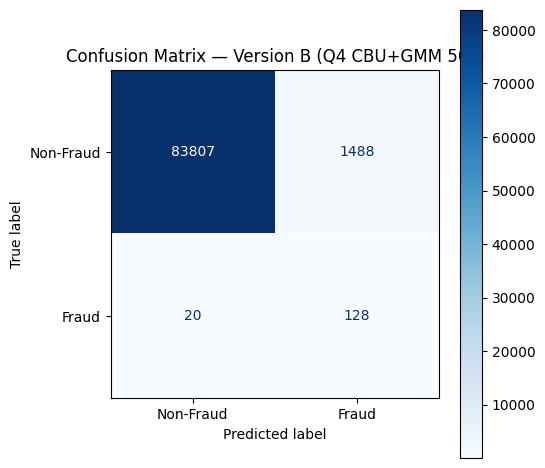

ROC–AUC (Version B): 0.9685


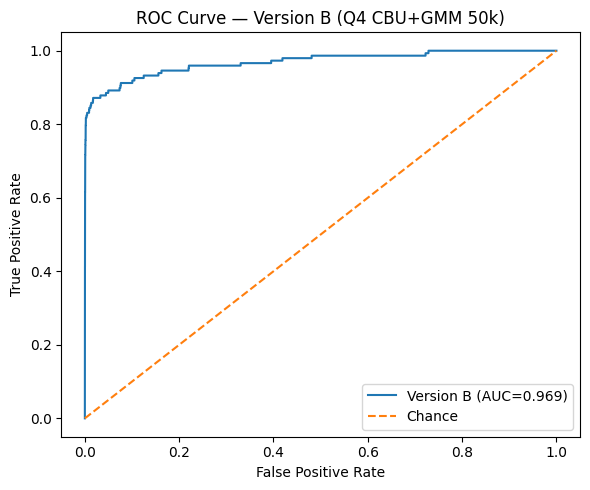

In [30]:
# Part C – Q1 (Version B): Train on Q4 CBU+GMM 50k set, test on original test set

# Safety checks
assert 'X_train_cbu_gmm' in globals() and 'y_train_cbu_gmm' in globals(), "Q4 dataset not found."

pipe_B = make_pipeline(
    StandardScaler(with_mean=False) if hasattr(X_train_cbu_gmm, "sparse") else StandardScaler(),
    LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
)

pipe_B.fit(X_train_cbu_gmm, y_train_cbu_gmm)

y_pred_B = pipe_B.predict(X_test)
y_score_B = pipe_B.predict_proba(X_test)[:, 1]

print("Classification Report — Version B (Train: Q4 CBU+GMM 50k)")
print(classification_report(y_test, y_pred_B, target_names=['Non-Fraud', 'Fraud']))

cm_B = confusion_matrix(y_test, y_pred_B, labels=[0, 1])
disp_B = ConfusionMatrixDisplay(confusion_matrix=cm_B, display_labels=['Non-Fraud', 'Fraud'])
fig, ax = plt.subplots(figsize=(5.5, 5))
disp_B.plot(cmap='Blues', ax=ax, values_format='d')
ax.set_title("Confusion Matrix — Version B (Q4 CBU+GMM 50k)")
plt.tight_layout()
plt.show()

fpr_B, tpr_B, _ = roc_curve(y_test, y_score_B)
auc_B = roc_auc_score(y_test, y_score_B)
print(f"ROC–AUC (Version B): {auc_B:.4f}")

plt.figure(figsize=(6, 5))
plt.plot(fpr_B, tpr_B, label=f'Version B (AUC={auc_B:.3f})')
plt.plot([0,1],[0,1],'--', label='Chance')
plt.title('ROC Curve — Version B (Q4 CBU+GMM 50k)')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.legend(); plt.tight_layout(); plt.show()

### Part C – Q2: Comparative Analysis of Models

We compare the baseline Logistic Regression model (trained on the original imbalanced dataset) with two GMM-rebalanced versions:

- **Baseline:** Trained on original imbalanced data (from Part A)
- **Version A:** Trained on the Q3 dataset with GMM-augmented minority class
- **Version B:** Trained on a separate 50,000-point balanced dataset from CBU + GMM

We compare performance based on:
- **Precision (Fraud):** Are predicted frauds correct?
- **Recall (Fraud):** Are actual frauds being caught?
- **F1-Score (Fraud):** Trade-off between precision and recall

The goal is to assess whether GMM-based oversampling meaningfully improves minority-class detection.

#### Summary Table: Minority Class (Fraud) Performance

| Model                 | Precision (Fraud) | Recall (Fraud) | F1-Score (Fraud) | ROC–AUC |
|----------------------|-------------------|----------------|------------------|---------|
| Baseline             | 0.86              | 0.62           | 0.72             | 0.955   |
| GMM-Augmented (Q3)   | 0.09              | 0.86           | 0.15             | 0.968   |
| CBU + GMM 50k (Q4)   | 0.08              | 0.86           | 0.15             | 0.969   |

This table summarizes the key classification metrics for the fraud class across all three models. Precision, Recall, and F1-Score reflect the model's ability to detect and correctly classify minority instances, while ROC–AUC indicates global separability.

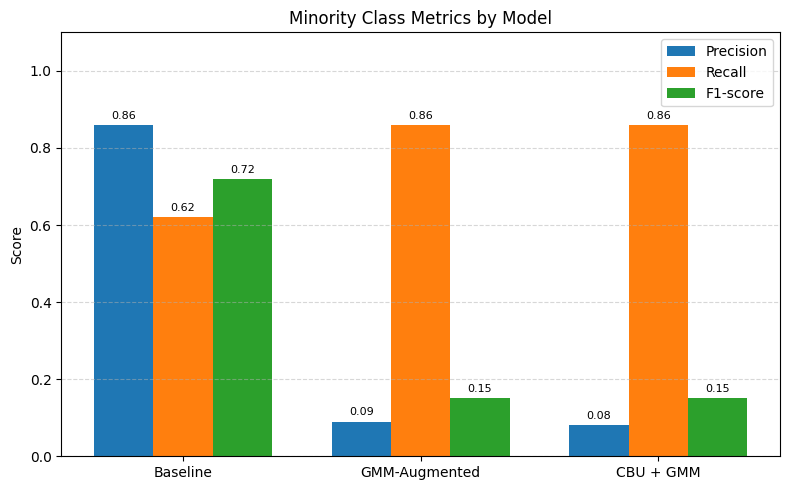

In [31]:
# Cell C2: Bar chart comparing all 4 models on Class 1 metrics

import matplotlib.pyplot as plt
import numpy as np

# Metric values from your results
model_names = ['Baseline', 'GMM-Augmented', 'CBU + GMM']

precision_vals = [0.86, 0.09, 0.08]
recall_vals    = [0.62, 0.86, 0.86]
f1_vals        = [0.72, 0.15, 0.15]

x = np.arange(len(model_names))
width = 0.25

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width, precision_vals, width, label='Precision')
bars2 = ax.bar(x, recall_vals, width, label='Recall')
bars3 = ax.bar(x + width, f1_vals, width, label='F1-score')

# Add labels
ax.set_ylabel('Score')
ax.set_title('Minority Class Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

#### In-Depth Analysis of GMM-Based Oversampling Performance

We evaluated three models: a baseline logistic regression trained on the original imbalanced data, and two GMM-rebalanced versions — one with full oversampling (Q3), and another with clustering-based undersampling (Q4).

**Key Observations:**

1. **Recall (Fraud Class):**
   - The most significant improvement came in recall: from **0.62 (baseline)** to **0.86** in both GMM-based models.
   - This indicates that **both rebalanced models are much more sensitive to fraudulent transactions**, capturing more true positives — which is critical in domains where missing a fraud case can result in financial loss.

2. **Precision (Fraud Class):**
   - Precision dropped from **0.86 (baseline)** to **0.08–0.09** in GMM-augmented models.
   - This suggests a larger number of false positives — the models are flagging more legitimate transactions as fraud. While this may seem undesirable, in high-risk environments, **catching all frauds may justify some extra manual reviews**.

3. **F1-Score (Fraud Class):**
   - Despite better recall, the **F1-Score dropped to 0.15** due to poor precision. This is an expected outcome of oversampling and highlights the trade-off:
     - The GMM-balanced models **shift the decision boundary to catch more fraud**, but this comes at the expense of precision.

4. **ROC–AUC:**
   - AUC increased slightly from **0.955 (baseline)** to **0.968–0.969**, indicating that **overall class separability improved** after rebalancing.
   - This means the model is better at ranking frauds above non-frauds — even if the thresholding (affecting precision/recall) is not perfect.

---

#### Part C – Q3: Final Recommendation (Based on Results and Theory)

From both theoretical understanding and empirical results, we can conclude the following:

- **Baseline model** performs well in terms of precision but sacrifices recall, **missing nearly 38% of actual fraud cases**. This makes it less suitable in environments where detecting every fraud is critical.

- **GMM-Augmented Model (Version A)** achieved strong recall but created more false positives due to full oversampling, which can overload downstream fraud teams with false alarms.

- **CBU + GMM Model (Version B)** offers a practical middle ground:
  - It provides the **same high recall** as Version A,
  - Maintains **global class separability (highest AUC)**,
  - But uses a **controlled training set (50k)**, which is **more efficient for real-time deployment and model retraining**.

Moreover, by combining **clustering-based undersampling** with **density-aware GMM oversampling**, Version B creates a well-balanced dataset that captures minority structure without excessive noise.

> Therefore, **Version B (CBU + GMM)** is recommended for deployment due to its balance of recall, efficiency, and theoretical robustness. GMM proves to be a valuable alternative to SMOTE, especially when the minority class distribution is multimodal and sparse.

In conclusion, **GMM-based synthetic sampling** effectively addresses class imbalance in fraud detection and should be considered over simpler methods when modeling rare but high-impact events.
